## Ejercicio 1

Resolver oscilador amortiguado:
$$m \ddot x=-k x -b \dot x,$$
usando $m=k=b=1$ y $x_0=1$, $\dot x_0=0$.

Usen Euler Y Runge-Kutta orden 4, comparen las soluciones, es decir, grafiquen el espacio de fase para cada método y despues juntos.

In [1]:
# Podemos utilizar la función vista en clase para el método de Euler independiente de las dimensiones del sistema.
function metodo_euler(f,list,x0)    # Función metodo_euler cuyas entradas son la función f, list que es el intervalo de tiempo y el punto inicial x0.
    x = x0                          # Condición inicial
    h = list[2]-list[1]             # El tamaño de paso h se obtiene de restar los primeros 2 elementos de la lista.
    listx = []                      # Arreglo vacío que guardará los resultados obtenidos con este método.
    push!(listx,x)                  # Agregamos al arreglo listx, el punto inicial con push
    for i in 2:length(list)         # Ciclo for que implementará la fórmula de recurrencia mostrada arriba para el método de Euler 
        t = i*h
        x = x + f(x,t)*h
        push!(listx,x)              # Para cada vuelta del ciclo, se agrega el resultado obtenido al arreglo listx 
    end
    return listx                    # La función metodo_euler regresa listx
end

metodo_euler (generic function with 1 method)

In [2]:
f(x,t) = [x[2], -x[1]-x[2]] # Función de 2 dimensiones considerando  m=k=b=1
list = 0:0.01:10;           # Intervalo de tiempo a considerar
vec = metodo_euler(f,list,[1,0]);   # El vector vec contiene la solución de nuestro sistema con las condiciones x(0)=1 y v(0)=0 
listx3 = map(x->x[1],vec);          # Posición 
listx4 = map(x->x[2],vec);          # Velocidad

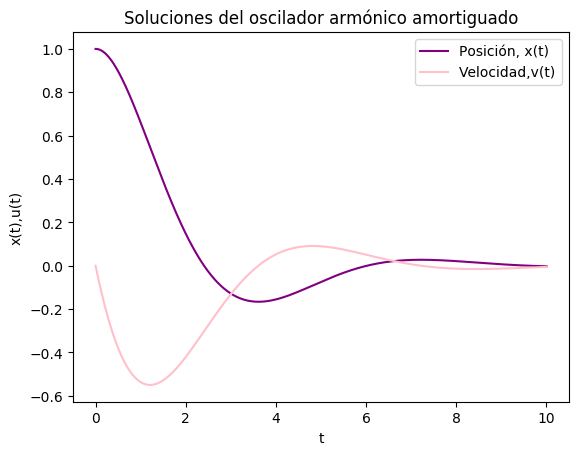

In [3]:
using PyPlot
xlabel("t")
ylabel("x(t),u(t)")
title("Soluciones del oscilador armónico amortiguado") 
plot(list,listx3, color ="purple", label = "Posición, x(t)") 
legend()
plot(list,listx4, color ="pink", label = "Velocidad,v(t)");
legend()
show()

In [4]:
# Podemos adaptar la función mostrada arriba para Euler independiente de las dimensiones del sistema, en este caso para el método de Runge-Kutta.
function metodo_Runge_Kutta(f,list,x0)    # Función metodo_Runge_Kutta cuyas entradas son la función f, list que es el intervalo de tiempo y el punto inicial x0.
    x = x0                          # Condición inicial
    h = list[2]-list[1]             # El tamaño de paso h se obtiene de restar los primeros 2 elementos de la lista.
    listx = []                      # Arreglo vacío que guardará los resultados obtenidos con este método.
    push!(listx,x)                  # Agregamos al arreglo listx, el punto inicial con push
    for i in 2:length(list)         # Ciclo for que implementará las fórmulas de recurrencia mostrada arriba para el método de Runge-Kutta 
        t = i*h
        k1 = f(x,t);
        k2 = f(x+(h/2)*k1,t+(h/2));
        k3 = f(x+(h/2)*k2, t+(h/2));
        k4 = f(x+h*k3, t);
        x = x+(h/6)*(k1+2*k2+2*k3+k4);
        push!(listx,x)              # Para cada vuelta del ciclo, se agrega el resultado obtenido al arreglo listx 
    end
    return listx                    # La función metodo_euler regresa listx
end

metodo_Runge_Kutta (generic function with 1 method)

In [5]:
# Utilizando el método de Runge-Kutta, con h=0.01, se obtienen las listas listx3 y listx4, que almacenarán la posición y velocidad del oscilador armónico, respectivamente.
f(x,t) = [x[2], -x[1]-x[2]] # Función de 2 dimensiones, considerando m=k=b=1
list = 0:0.01:10;           # Intervalo de tiempo a considerar
vec = metodo_Runge_Kutta(f,list,[1,0]);   # El vector vec contiene la solución de nuestro sistema con las condiciones x(0)=1 y v(0)=0 
listx5 = map(x->x[1],vec);          # Posición 
listx6 = map(x->x[2],vec);          # Velocidad

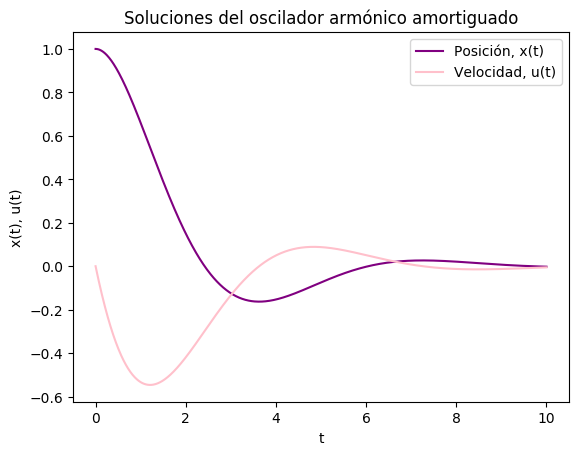

In [6]:
using PyPlot
xlabel("t")
ylabel("x(t), u(t)")
title("Soluciones del oscilador armónico amortiguado") 
plot(list,listx5, color ="purple", label = "Posición, x(t)") # Graficando las soluciones obtenidas para las energías potencial y cinética del oscilador armónico.  
legend()
plot(list,listx6, color ="pink", label = "Velocidad, u(t)");
legend()
show()

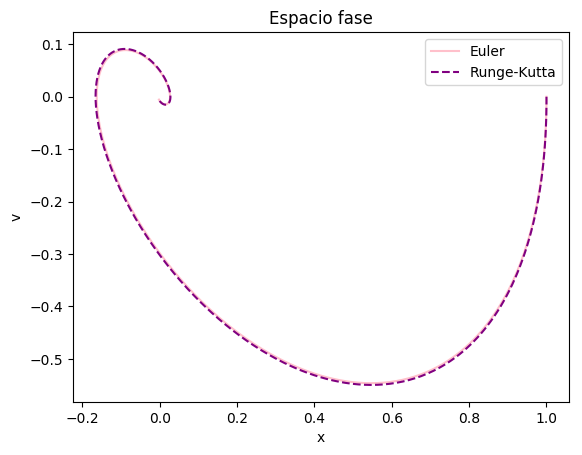

In [7]:
using PyPlot
xlabel("x")
ylabel("v")
title("Espacio fase") 
plot(listx5,listx6, color ="pink", label = "Euler")  # Graficando x vs. v 
legend()
plot(listx3,listx4, color ="purple", "--", label = "Runge-Kutta")  # Graficando x vs. v 
legend()
show()


## Ejercicio 2

Resolver el pendulo simple usando Runge-Kutta de cuarto orden. Graficar muchas condiciones iniciales.

In [8]:
g(x,t) = [x[2],-sin(x[1])]     # Función de 2 dimensiones 
list = 0:0.01:10;              # Intervalo de tiempo a considerar
vec =  metodo_Runge_Kutta(g,list,[1,0]);   # El vector vec contiene la solución de nuestro sistema con las condiciones propuestas.
listx7 = map(x->x[1],vec);          # Posición 
listx8 = map(x->x[2],vec);          # Velocidad

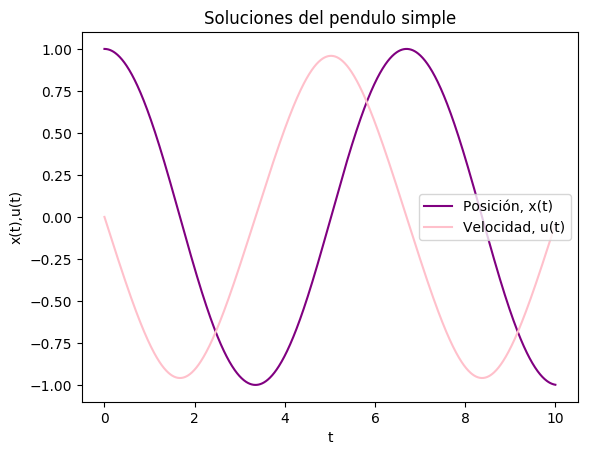

In [9]:
using PyPlot
xlabel("t")
ylabel("x(t),u(t)")
title("Soluciones del pendulo simple") 
plot(list,listx7, color ="purple", label = "Posición, x(t)") 
legend()
plot(list,listx8, color ="pink", label = "Velocidad, u(t)");
legend()
show()

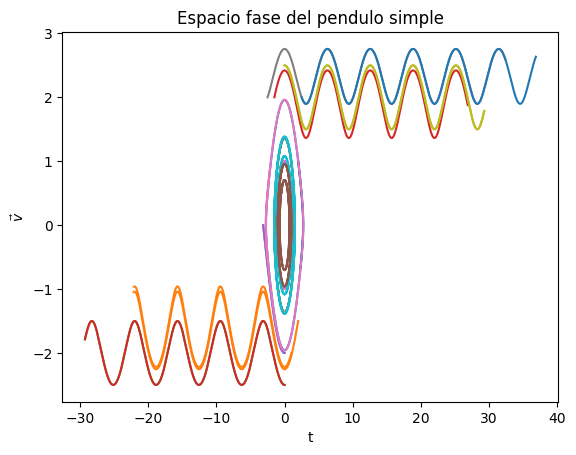

In [10]:
# Para poder graficar muchas condiciones iniciales

mb(x,t) = [x[2],-sin(x[1])]  # Función de 2 dimensiones para el pendulo 
list=-10:0.01:5
for i in 1:20
    w=0.5*rand(-5:5,2,1)
    y1 = metodo_Runge_Kutta(mb,list,w); # El vector y1 contiene la solución de nuestro sistema con las condiciones iniciales aleatorias para cada vuelta del ciclo.
    flistx1_kutta = map(x->x[1],y1);   # Posición 
    flistx2_kutta = map(x->x[2],y1);   # Velocidad
    title("Espacio fase del pendulo simple")
    xlabel("t")
    ylabel(L"\vec{v}")  
    plot(flistx1_kutta,flistx2_kutta);
end

El centro corresponde al estado de equilibrio y los círculos a su alrededor corresponden a pequeñas oscilaciones sobre la posición de equilibrio. Cuando el pendulo da una vuelta completa, se obtienen las curvas de los extremos superior e inferior del espacio fase.

Para los ejercicios 3 y 4 utilizaremos la función para el método de Runge-Kutta mostrada a continuación.

In [11]:
function runge_kutta_4(f,x0,t0,tf,h)  # Función Runge-Kutta cuyas entradas son la función f, los tiempos inicial y final, el punto inicial x0 y el tamaño de paso h.
    n=round((tf-t0)/h)+1               
    listt=linspace(t0,tf,n) 
    listx = zeros(n)              # Creamos un arreglo de n elementos, considerando n=(tf-t0)/h, donde se irán guardando las x´s obtenidas con el método de Runge Kutta.
    listx[1] = x0 
    for i in 1:length(listx)-1    # Ciclo for para implementar la fórmula de recurrencia mostrada arriba.
        k1 = f(listx[i], listt[i])
        k2 = f(listx[i] + h*(k1)/2, listt[i+1])
        k3 = f(listx[i] + h*(k2)/2, listt[i+1])
        k4 = f(listx[i] + h*(k3), listt[i],)
        listx[i+1] = listx[i] + h/6*(k1 + 2*(k2) + 2*(k3) + k4)
    end
    return listt,listx    # La función Runge-Kutta arroja los valores obtenidos para listt y listx.
end;

## Ejercicio 3 
Comprobar numéricamente (con Runge-Kutta orden $4$) que en el sistema:
$$\frac{dx}{dt}=x^2-1,$$
hay dos _puntos fijos_, ubicados en $1$ y $-1$, compruebe además que el $1$ es un _repulsor_ y el $-1$ un _atractor_. Para hacer esto necesitará graficar muchas condiciones iniciales, generelas aleatoriamente y gráfiquelas en el espacio $(x(t),t)$.

In [12]:
function a(x,t)           # Función a
    return x^2-1
end

a (generic function with 1 method)

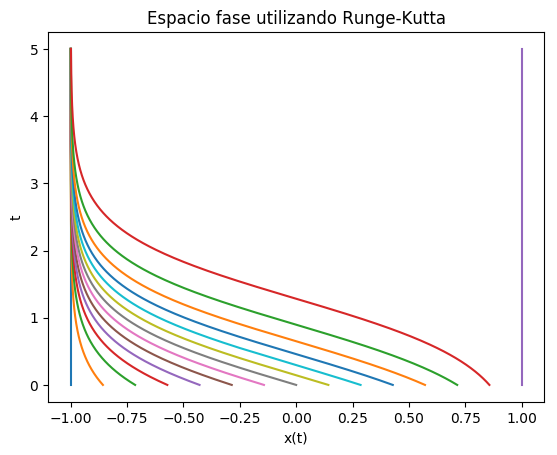

In [13]:
using PyPlot

randoms1 =linspace(-1,1,15)
for i in 1:length(randoms1)
    kutta = runge_kutta_4(a,randoms1[i],0,5,0.01);
    xlabel("x(t)")
    ylabel("t")   
    title("Espacio fase utilizando Runge-Kutta")
    plot(kutta[2],kutta[1]);
end;

A partir de la gráfica obtenida, se comprueba que -1 es un punto atractor mientras que 1 es un punto repulsor, ya que las trayectorias se acercan al -1, alejándose del 1.

## Ejercicio 4
También con Runge-Kutta orden $4, $Resuelva numéricamente el sistema:
$$\frac{dx}{dt}=x^2,$$
cual es el punto fijo único?, es un _atractor_ o un _repulsor_?. Utilice de igual forma muchas condiciones iniciales y gráfiquelas en el mismo espacio que en el ejercicio anterior.

In [14]:
function q(x,t)           # Función f 
    return x^2
end

q (generic function with 1 method)

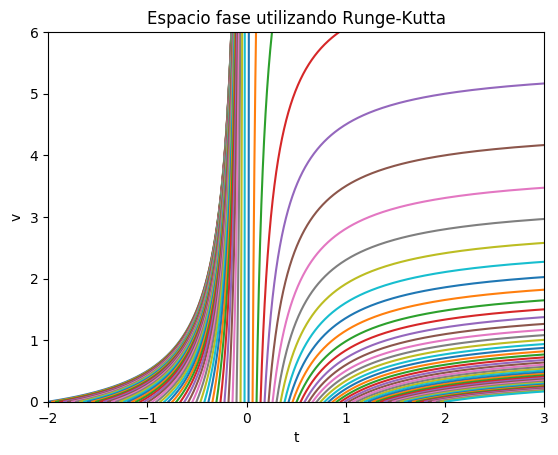

In [15]:
randoms2 = linspace(-2,2,100)
for i in 1:length(randoms2)
    kutta = runge_kutta_4(q,randoms2[i],0,10,0.01);
    xlabel("t")
    ylabel("v")   
    title("Espacio fase utilizando Runge-Kutta")
    xlim(-2,3)
    ylim(0,6)
    plot(kutta[2],kutta[1]);
end;

El único punto fijo es el cero, el cual es un punto silla, ya que hay trayectorias que se acercan al cero, pero hay otras que se alejan.

## Ejercicio 5
Resolver con Runge-Kutta orden $4$ el sistema de ecuaciones:
$$\frac{d\vec x}{dt}=\left(\begin{array}{cc} a & b \\ c & d \end{array}\right)\vec x,$$
donde $\vec x= \left(x(t),y(t)\right)^{\text{T}}.$
Grafique los espacios de fase tomando muchas condiciones iniciales aleatorias y fijando los rangos de los ejes alrededor del origen, de tal forma que se aprecie el compotamiento de las soluciones. Haga esto para los sistemas con:

Para graficar muchas condiciones iniciales vamos a utilizar un ciclo for, cambiando el como se define la función f en base a los valores dados para a,b, c y d.

* $a=c=1$, $b=d=0$

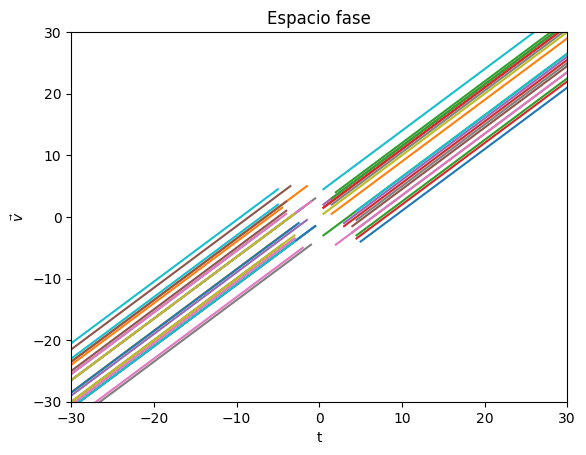

In [16]:
j(x,t) = [x[1],x[1]] 
list=-10:0.01:5                        # Intervalo de tiempo a considerar
for i in 1:50                          # Se realizará el ciclo para 20 condiciones iniciales 
    w = 0.5*rand(-10:10,2,1)           # Para poder variar las condiciones iniciales aleatoriamente, siendo un vector de (2,1) y tomando los posibles valores entre -10 y 10
    y1 = metodo_Runge_Kutta(j,list,w); # Aplicando el método de Runge-Kutta de 4 orden 
    flistx1_kutta = map(x->x[1],y1);   # Posición
    flistx2_kutta = map(x->x[2],y1);   # Velocidad
    title("Espacio fase")
    xlabel("t")
    ylabel(L"\vec{v}")  
    plot(flistx1_kutta,flistx2_kutta);
    xmin, xmax = xlim()     
    ymin, ymax = ylim()
    xlim( -30, 30)    
    ylim( -30, 30)
end

* $a=c=-1$, $b=d=0$

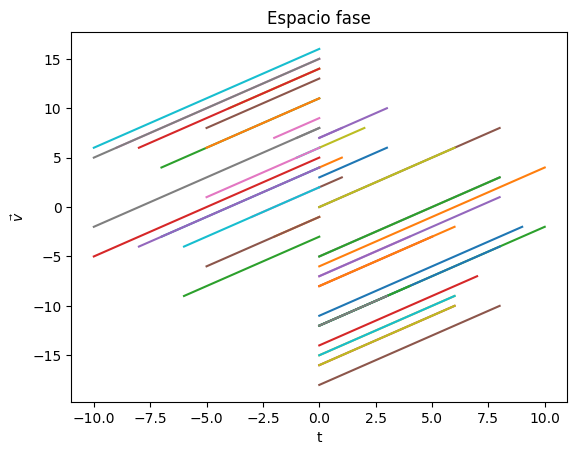

In [17]:
k(x,t) = [-x[1], -x[1]] 
list=-10:0.01:5
for i in 1:50
    w=rand(-10:10,2,1)
    y1 = metodo_Runge_Kutta(k,list,w); 
    flistx1_kutta = map(x->x[1],y1);
    flistx2_kutta = map(x->x[2],y1);
    title("Espacio fase")
    xlabel("t")
    ylabel(L"\vec{v}")  
    plot(flistx1_kutta,flistx2_kutta); 
end

* $a=1$, $b=-2$, $c=d=0$

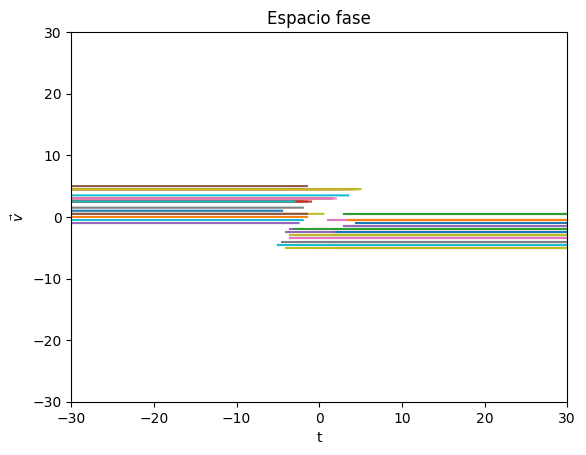

In [18]:
l(x,t) = [x[1]-2*x[2], 0] 
list=-10:0.01:5
for i in 1:50
    w=0.5*rand(-10:10,2,1)
    y1 = metodo_Runge_Kutta(l,list,w); 
    flistx1_kutta = map(x->x[1],y1);
    flistx2_kutta = map(x->x[2],y1);
    title("Espacio fase")
    xlabel("t")
    ylabel(L"\vec{v}")  
    plot(flistx1_kutta,flistx2_kutta);
    xmin, xmax = xlim()     
    ymin, ymax = ylim()
    xlim( -30, 30)    
    ylim( -30, 30)
    
end

* $a=1$, $b=-0.5$, $c=d=0$

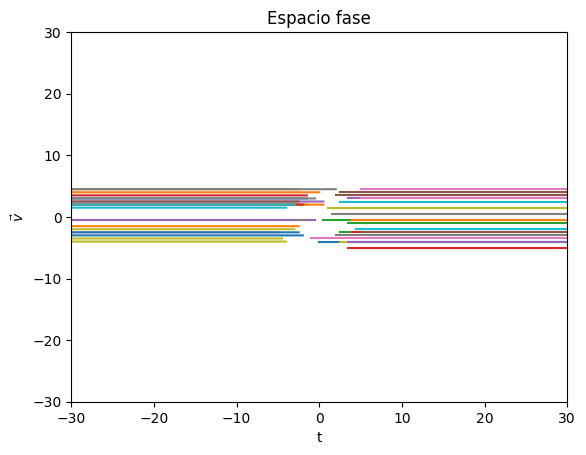

In [19]:
m(x,t) = [x[1]-0.5*x[2], 0] 
list=-10:0.01:5
for i in 1:50
    w=0.5*rand(-10:10,2,1)
    y1 = metodo_Runge_Kutta(m,list,w); 
    flistx1_kutta = map(x->x[1],y1);
    flistx2_kutta = map(x->x[2],y1);
    title("Espacio fase")
    xlabel("t")
    ylabel(L"\vec{v}")  
    plot(flistx1_kutta,flistx2_kutta);
    xmin, xmax = xlim()     
    ymin, ymax = ylim()
    xlim( -30, 30)    
    ylim( -30, 30)
end

* $a=d=0$, $b=-c=1$

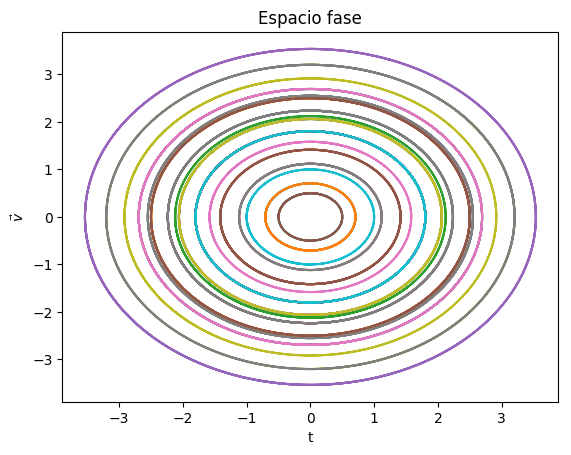

In [20]:
n(x,t) = [x[2], -x[1]] 
list=-10:0.01:5
for i in 1:50
    w=0.5*rand(-5:5,2,1)
    y1 = metodo_Runge_Kutta(n,list,w); 
    flistx1_kutta = map(x->x[1],y1);
    flistx2_kutta = map(x->x[2],y1);
    title("Espacio fase")
    xlabel("t")
    ylabel(L"\vec{v}")  
    plot(flistx1_kutta,flistx2_kutta);
end

* $a=d=1$, $b=-c=1$

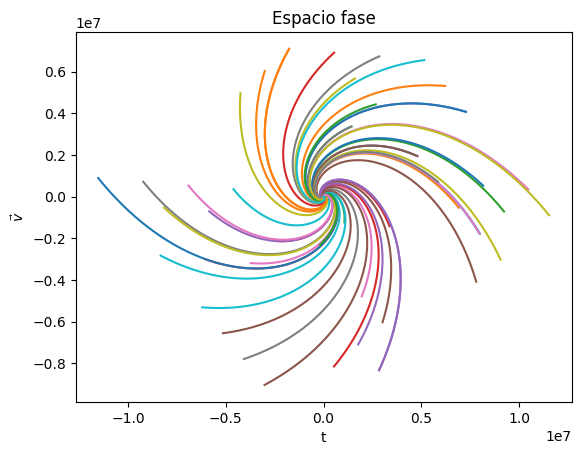

In [21]:
o(x,t) = [x[1]+x[2], -x[1]+x[2]] 
list=-10:0.01:5
for i in 1:50
    w=0.5*rand(-5:5,2,1)
    y1 = metodo_Runge_Kutta(o,list,w); 
    flistx1_kutta = map(x->x[1],y1);
    flistx2_kutta = map(x->x[2],y1);
    title("Espacio fase")
    xlabel("t")
    ylabel(L"\vec{v}")  
    plot(flistx1_kutta,flistx2_kutta);

end

* $a=d=-1$, $b=-c=1$

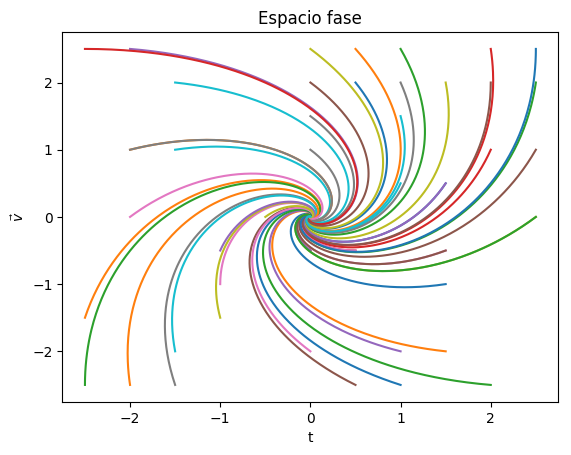

In [22]:
p(x,t) = [-x[1]+x[2], -x[1]-x[2]] 
list=-10:0.01:5
for i in 1:50
    w=0.5*rand(-5:5,2,1)
    y1 = metodo_Runge_Kutta(p,list,w); 
    flistx1_kutta = map(x->x[1],y1);
    flistx2_kutta = map(x->x[2],y1);
    title("Espacio fase")
    xlabel("t")
    ylabel(L"\vec{v}")  
    plot(flistx1_kutta,flistx2_kutta);  
end

* $a=d=-1$, $b=-c=-1$

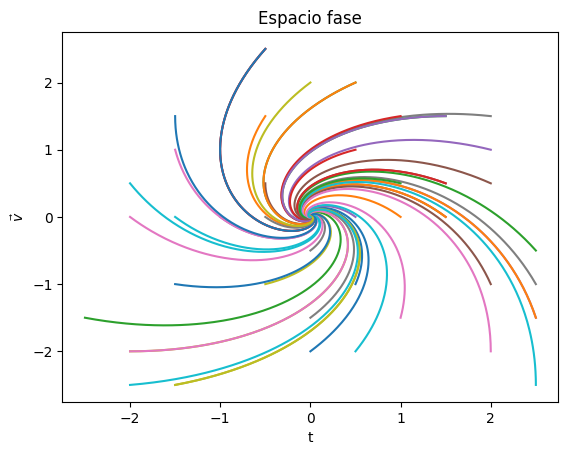

In [23]:
q(x,t) = [-x[1]-x[2], x[1]-x[2]] 
list=-10:0.01:5
for i in 1:50
    w=0.5*rand(-5:5,2,1)
    y1 = metodo_Runge_Kutta(q,list,w); 
    flistx1_kutta = map(x->x[1],y1);
    flistx2_kutta = map(x->x[2],y1);
    title("Espacio fase")
    xlabel("t")
    ylabel(L"\vec{v}")  
    plot(flistx1_kutta,flistx2_kutta);
end

* $a=d=1$, $b=4,c=-2$

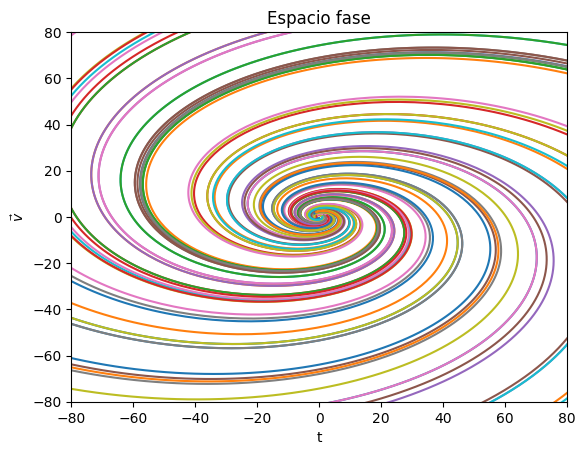

In [24]:
r(x,t) = [x[1]+4x[2], -2*x[1]+1*x[2]] 
list=-10:0.01:5
for i in 1:50
    w=0.5*rand(-5:5,2,1)
    y1 = metodo_Runge_Kutta(r,list,w); 
    flistx1_kutta = map(x->x[1],y1);
    flistx2_kutta = map(x->x[2],y1);
    title("Espacio fase")
    xlabel("t")
    ylabel(L"\vec{v}")  
    plot(flistx1_kutta,flistx2_kutta);
    xmin, xmax = xlim()       
    ymin, ymax = ylim()
    xlim( -80, 80 )  
    ylim( -80, 80)  
end

* $a=b=d=-1$, $c=0$

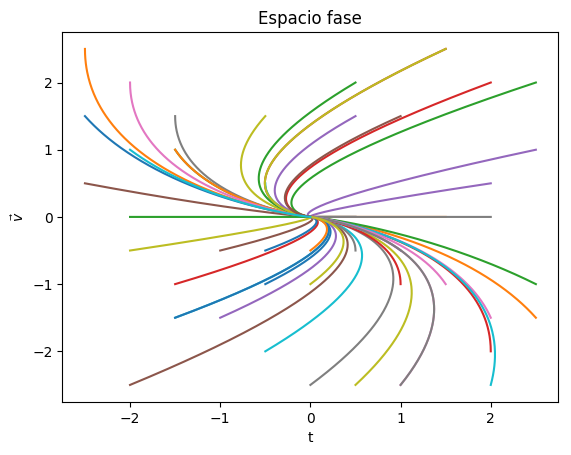

In [25]:
s(x,t) = [-x[1]-x[2], -x[2]] 
list=-10:0.01:5
for i in 1:50
    w=0.5*rand(-5:5,2,1)
    y1 = metodo_Runge_Kutta(s,list,w); 
    flistx1_kutta = map(x->x[1],y1);
    flistx2_kutta = map(x->x[2],y1);
    title("Espacio fase")
    xlabel("t")
    ylabel(L"\vec{v}")  
    plot(flistx1_kutta,flistx2_kutta);
end